In [ ]:
# CREATE PREDICTION FOR the 10th week, 30th week, 40th week

In [ ]:
'''!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'''

'!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'

In [ ]:
import pandas as pd
import os

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose


# To ignore all warnings
warnings.filterwarnings("ignore")

# Or to ignore specific warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#df=pd.read_excel(r"t1_germany_files/shipment_complete_data_active_lane.xlsx")
df=pd.read_excel('/content/shipment_complete_data_active_lane.xlsx')
# os.listdir()

In [ ]:
high_lanes = ['DE02_29142970', 'DE02_29145063', 'DE08_29144124', 'DE05_29724961', 'DE08_29222753', 'DE08_29242683', 'DE05_29146035', 'DE08_29292703', 'DE05_29546496', 'DE02_29626095', 'DE08_29142964', 'DE08_29144781', 'DE08_29143647', 'DE08_29143519']
high_lanes

['DE02_29142970',
 'DE02_29145063',
 'DE08_29144124',
 'DE05_29724961',
 'DE08_29222753',
 'DE08_29242683',
 'DE05_29146035',
 'DE08_29292703',
 'DE05_29546496',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [ ]:
df['Lane']=df['Lane'].astype('str')
old_lanes= df.groupby('Lane')['shipment'].sum().sort_values().tail(7).index.tolist()

In [ ]:
df_h = df[df['Lane'].isin(high_lanes)]
print(len(df_h))

2912


In [ ]:
new_lanes = [item for item in high_lanes if item not in old_lanes]
new_lanes

['DE08_29242683',
 'DE08_29292703',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [ ]:
df2 = df_h[['date','shipment','Lane']]  #timeseries data

# Convert the datetime column to datetime format (if necessary)
df2['date'] = pd.to_datetime(df2['date'])

# Set the datetime column as the index
df2 = df2.set_index('date')

print(df2.sort_values(by='Lane'))

            shipment           Lane
date                               
2020-01-06        11  DE02_29142970
2022-07-18        22  DE02_29142970
2022-07-25        15  DE02_29142970
2022-08-01        18  DE02_29142970
2022-08-08        12  DE02_29142970
...              ...            ...
2021-05-24         7  DE08_29292703
2021-05-31         0  DE08_29292703
2021-06-07        10  DE08_29292703
2021-12-20        11  DE08_29292703
2023-12-25         8  DE08_29292703

[2912 rows x 2 columns]


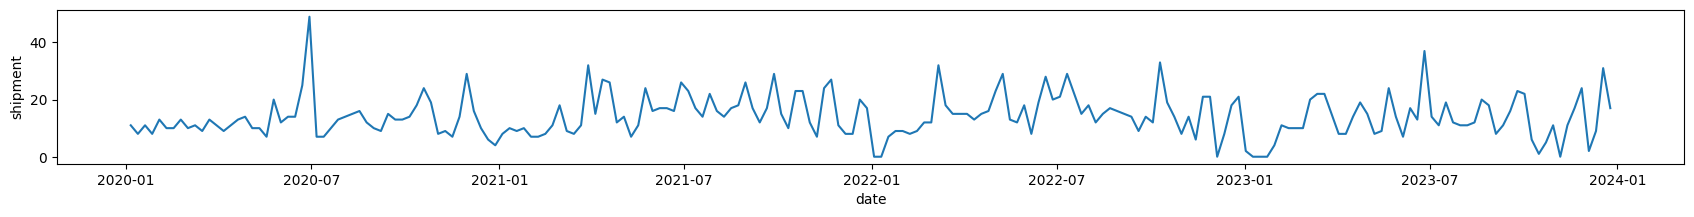

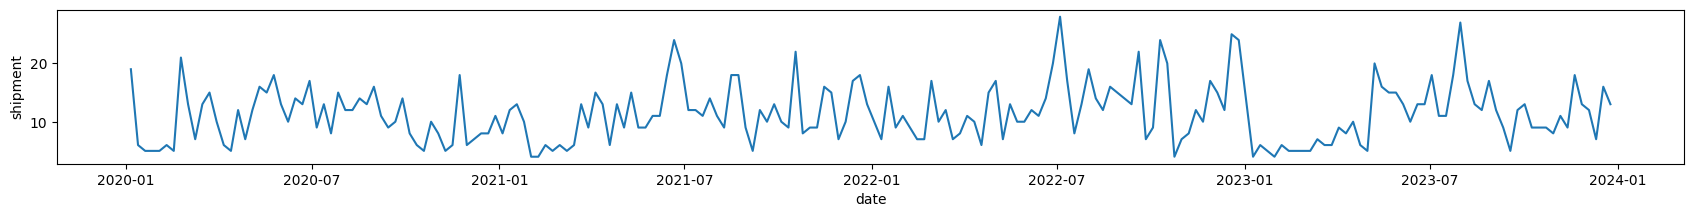

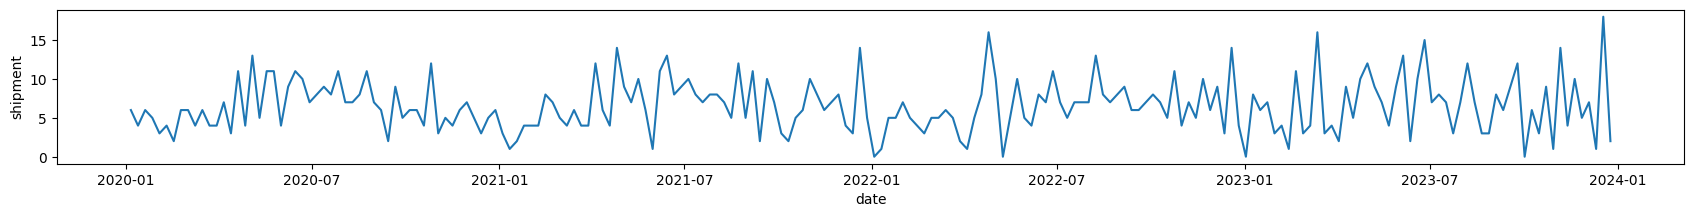

In [ ]:
# prompt: create a lineplot with hue=Column2, index=column1 and plit of column3 pandas


for lane in df2['Lane'].unique()[:3]:
  plt.figure(figsize=(21,2))
  data=df2[df2['Lane']==lane]
  sns.lineplot(
      x=data.index,
      y=data['shipment']
  )
  plt.show()



In [ ]:
last4_lanes = ['DE02_29142970'] #['DE08_29144781'] #,'DE08_29143519','DE08_29143647','DE08_29292703']
df3 = df2[df2['Lane'].isin(last4_lanes)]

In [ ]:
df3.shape

(208, 2)

In [ ]:
############ ONLY DOING FOR 4 LANES TOGETHER #############

In [ ]:
data=df3.copy().rename(columns={'Lane':'lane'})
data.head()

,shipment,lane
date,,
2020-01-06,11,DE02_29142970
2020-01-13,8,DE02_29142970
2020-01-20,11,DE02_29142970
2020-01-27,8,DE02_29142970
2020-02-03,13,DE02_29142970


In [ ]:
#data.lane.value_counts()

In [ ]:
# prompt: create a pivot on data table df

'''df_pivot = data.pivot_table(
    index='date',
    columns='lane',
    values='shipment'
)
df_pivot.head()

'''


"df_pivot = data.pivot_table(\n    index='date',\n    columns='lane',\n    values='shipment'\n)\ndf_pivot.head()\n\n"

In [ ]:
'''df_pivot.reset_index(inplace=True)
df_pivot.head(5)'''

'df_pivot.reset_index(inplace=True)\ndf_pivot.head(5)'

In [ ]:
'''data=df_pivot.copy() #last4_lanes'''

'data=df_pivot.copy() #last4_lanes'

In [ ]:
df3

,shipment,Lane
date,,
2020-01-06,11,DE02_29142970
2020-01-13,8,DE02_29142970
2020-01-20,11,DE02_29142970
2020-01-27,8,DE02_29142970
2020-02-03,13,DE02_29142970
...,...,...
2023-11-27,24,DE02_29142970
2023-12-04,2,DE02_29142970
2023-12-11,9,DE02_29142970


In [ ]:
df3['shipment'][:-30]

date
2020-01-06    11
2020-01-13     8
2020-01-20    11
2020-01-27     8
2020-02-03    13
              ..
2023-05-01    15
2023-05-08     8
2023-05-15     9
2023-05-22    24
2023-05-29    14
Name: shipment, Length: 178, dtype: int64

In [ ]:
#### LETS GIVE 1 MONTH PREDICTION (4 UNITS)
#### LETS PASS 1 MONTH LESS DATA (4 UNITS)

In [ ]:
df2

,shipment,Lane
date,,
2020-01-06,11,DE02_29142970
2020-01-13,8,DE02_29142970
2020-01-20,11,DE02_29142970
2020-01-27,8,DE02_29142970
2020-02-03,13,DE02_29142970
...,...,...
2023-11-27,20,DE08_29292703
2023-12-04,0,DE08_29292703
2023-12-11,2,DE08_29292703


Epoch: 0 | Loss: 0.05666046217083931
Epoch: 10 | Loss: 0.03186875209212303
Epoch: 20 | Loss: 0.030537527054548264
Epoch: 30 | Loss: 0.03096272610127926
Epoch: 40 | Loss: 0.0312512069940567
Epoch: 50 | Loss: 0.029887545853853226
Epoch: 60 | Loss: 0.02995375357568264
Epoch: 70 | Loss: 0.031178202480077744
Epoch: 80 | Loss: 0.02871285006403923
Epoch: 90 | Loss: 0.03123769536614418
Predictions for the next 30 points:
[[3.281245  5.667396  8.451022  5.3856335 4.311912  6.12471   6.7601566
  5.8112845 8.462325  7.8801007]]
Sum error formula is  69.74
Epoch: 0 | Loss: 0.0628887191414833
Epoch: 10 | Loss: 0.04138065502047539
Epoch: 20 | Loss: 0.04082978516817093
Epoch: 30 | Loss: 0.04087967425584793
Epoch: 40 | Loss: 0.040644895285367966
Epoch: 50 | Loss: 0.04046102613210678
Epoch: 60 | Loss: 0.040632184594869614
Epoch: 70 | Loss: 0.03964061662554741
Epoch: 80 | Loss: 0.038351017981767654
Epoch: 90 | Loss: 0.03392688184976578
Predictions for the next 30 points:
[[8.100091  7.441474  6.8865466 

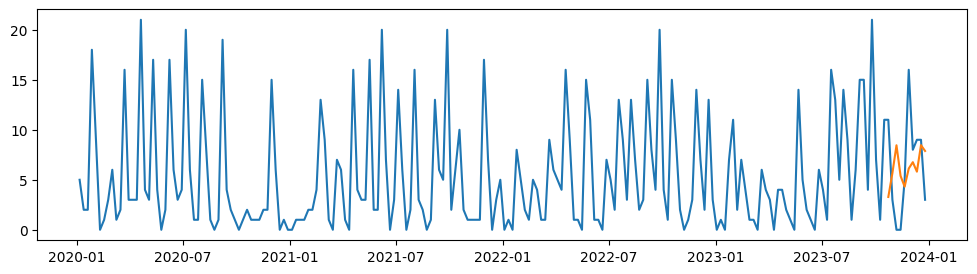

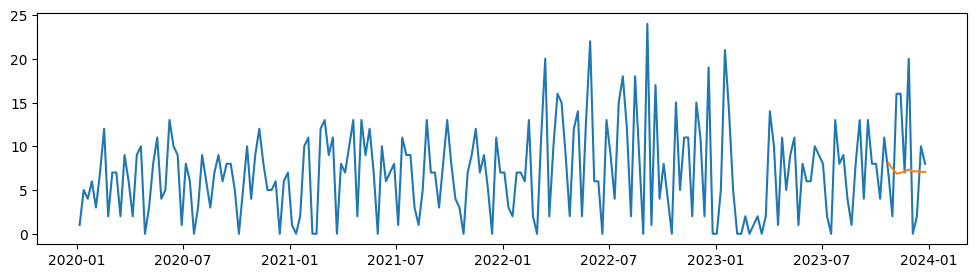

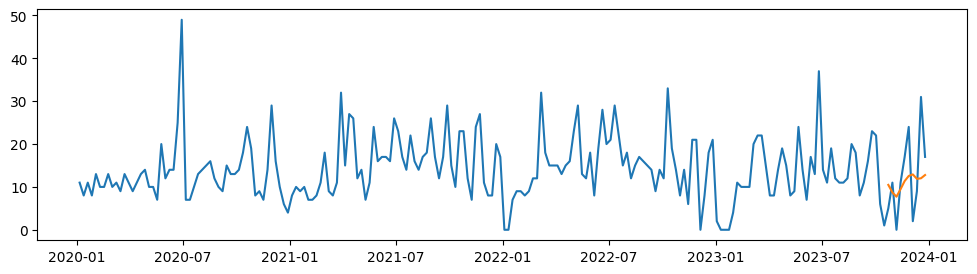

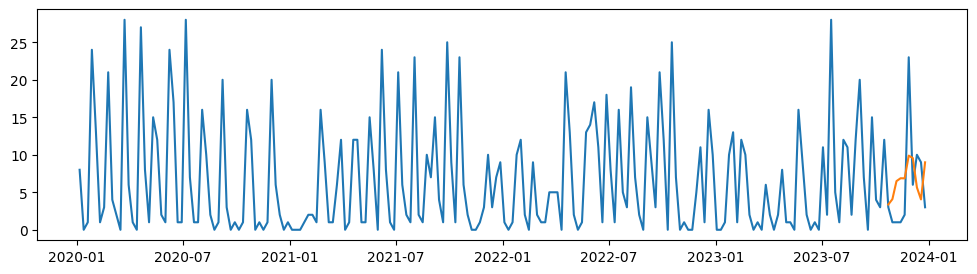

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### DOING FOR K POINTS prediction
k=10

for lane in  ['DE08_29144781','DE08_29292703','DE02_29142970','DE08_29143647']:

  df3=df2[df2['Lane']==lane].copy()

  # Extract the numerical data
  data = df3['shipment'][:-30].values.reshape(-1, 1)

  # Normalize the data
  scaler = MinMaxScaler()
  data_normalized = scaler.fit_transform(data)

  # Convert data to PyTorch tensor
  data_tensor = torch.FloatTensor(data_normalized)

  # Define parameters
  n_steps = 13  # Number of time steps to look back
  n_features = 1  # Number of features (only 'shipment' in this case)
  n_future = k  # Number of future time steps to predict
  batch_size = 8
  epochs = 100
  learning_rate = 0.001

  # Prepare the data in the format required for LSTM
  X, y = [], []
  for i in range(len(data_normalized) - n_steps - n_future + 1):
      X.append(data_normalized[i:i+n_steps])
      y.append(data_normalized[i+n_steps:i+n_steps+n_future])

  X = torch.stack([torch.Tensor(x) for x in X])
  y = torch.stack([torch.Tensor(y_val) for y_val in y])

  # Define the LSTM model
  class LSTMModel(nn.Module):
      def __init__(self, input_size=n_features, hidden_layer_size=64, output_size=n_future, num_layers=3, dropout=0.2):
          super().__init__()
          self.hidden_layer_size = hidden_layer_size
          self.num_layers = num_layers
          self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers, batch_first=True, dropout=dropout)
          self.linear = nn.Linear(hidden_layer_size, output_size)


      def forward(self, input_seq):
          h0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size)
          c0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size)
          lstm_out, _ = self.lstm(input_seq, (h0, c0))
          predictions = self.linear(lstm_out[:, -1, :])
          return predictions

  model = LSTMModel()

  # Define loss function and optimizer
  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  for epoch in range(epochs):
      for i in range(0, len(X), batch_size):
          optimizer.zero_grad()
          y_pred = model(X[i:i+batch_size])

          single_loss = loss_function(y_pred, y[i:i+batch_size].view(-1, n_future))
          single_loss.backward()
          optimizer.step()

      if epoch % 10 == 0:
          print(f'Epoch: {epoch} | Loss: {single_loss.item()}')

  # Predict the next k points
  with torch.no_grad():
      future_predictions = model(data_tensor[-n_steps:].view(1, n_steps, -1))

  # Inverse transform the predictions
  future_predictions = future_predictions.view(-1, n_future).numpy()
  future_predictions_inverse = scaler.inverse_transform(future_predictions)

  # Print predictions
  print("Predictions for the next 30 points:")
  print(future_predictions_inverse)


  final = df3[-k:].copy()
  final['forecast'] = future_predictions_inverse[0]
  final

  # plot the predictions
  plt.figure(figsize=(12,3))
  plt.plot(df3['shipment'])
  plt.plot(final['forecast'])

  # og method for error
  final['error'] = final['shipment']-final['forecast']
  final['error_abs']=np.abs(final['error'])

  error = final['error_abs'].sum() / final['shipment'].sum()
  print(f"Sum error formula is  {round(error*100,2)}")


,shipment,Lane,forecast
date,,,
2023-06-05,7,DE02_29142970,18.328629
2023-06-12,17,DE02_29142970,19.151625
2023-06-19,13,DE02_29142970,19.103937
2023-06-26,37,DE02_29142970,19.691204
2023-07-03,14,DE02_29142970,19.763945
2023-07-10,11,DE02_29142970,20.180315
2023-07-17,19,DE02_29142970,20.620335
2023-07-24,12,DE02_29142970,20.081423
2023-07-31,11,DE02_29142970,19.727011


0.5718366732964149


In [ ]:
## DEIFNING THE DATES NEEDED TO BE FORECASTED

w= 30
yr=2023
df_h

date_points= [w-2,w-1,w,w+1, w+11,w+12,w+13,w+14, w+16]

dates = df_h[(df_h['week'].isin(date_points)) *(df_h['year']==yr)]['date'].unique()
dates


array(['2023-07-10T00:00:00.000000000', '2023-07-17T00:00:00.000000000',
       '2023-07-24T00:00:00.000000000', '2023-07-31T00:00:00.000000000',
       '2023-10-09T00:00:00.000000000', '2023-10-16T00:00:00.000000000',
       '2023-10-23T00:00:00.000000000', '2023-10-30T00:00:00.000000000',
       '2023-11-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
################ original predictions ##########

In [ ]:
pred_dates = df_h[(df_h['week'].isin([x+2 for x in date_points])) *(df_h['year']==yr)]['date'].unique()
print(pred_dates)


og_df=df2[df2['Lane'].isin(lanes) * df2.index.isin(pred_dates)].sort_values(by='Lane')
og_df.head(3)

['2023-07-24T00:00:00.000000000' '2023-07-31T00:00:00.000000000'
 '2023-08-07T00:00:00.000000000' '2023-08-14T00:00:00.000000000'
 '2023-10-23T00:00:00.000000000' '2023-10-30T00:00:00.000000000'
 '2023-11-06T00:00:00.000000000' '2023-11-13T00:00:00.000000000'
 '2023-11-27T00:00:00.000000000']


,shipment,Lane
date,,
2023-07-24,7,DE08_29142964
2023-07-31,9,DE08_29142964
2023-08-07,7,DE08_29142964


In [ ]:
#df2.index[-30:]

In [ ]:
import numpy as np

final = pd.concat([og_df.reset_index(),results_df.reset_index()], axis=1,)
final['abs_error'] = np.abs(final['Forecast']-final['shipment'])
final['abs_error_perc'] = np.abs(final['Forecast']-final['shipment'])*100/final['shipment']

final

,date,shipment,Lane,Date,Lane,Forecast,abs_error,abs_error_perc
0,2023-07-24,7,DE08_29142964,2023-07-10,DE08_29142964,8.133822,1.133822,16.197457
1,2023-07-31,9,DE08_29142964,2023-07-17,DE08_29142964,4.974719,4.025281,44.725347
2,2023-08-07,7,DE08_29142964,2023-07-24,DE08_29142964,7.129246,0.129246,1.846368
3,2023-08-14,2,DE08_29142964,2023-07-31,DE08_29142964,5.760139,3.760139,188.006968
4,2023-10-23,3,DE08_29142964,2023-10-09,DE08_29142964,6.965621,3.965621,132.187380
5,2023-10-30,1,DE08_29142964,2023-10-16,DE08_29142964,2.701269,1.701269,170.126936
6,2023-11-06,1,DE08_29142964,2023-10-23,DE08_29142964,5.516003,4.516003,451.600296
7,2023-11-13,4,DE08_29142964,2023-10-30,DE08_29142964,9.995176,5.995176,149.879399
8,2023-11-27,28,DE08_29142964,2023-11-13,DE08_29142964,5.142395,22.857605,81.634302


In [ ]:
final=final.loc[:, ~final.columns.duplicated()]


In [ ]:
#### NEW LANES ADDED
#final[final['Lane'].isin(['DE02_29626095','DE08_29142964','DE08_29242683'])]


In [ ]:
'''OVERALL FORMULA FOR ACCURACY | ACROSS ALL 3 MEASUREMETS'''

####### ACTUAL FORMULA




a=final['abs_error'].sum()
b=final['shipment'].sum()
print("The overall addition formula error is ",a,",", b , "," ,a/b)


# WEIGHTED ABSOLUTE ERROR
non_inf_df= final[final['abs_error_perc']<5000]
print(f" non inf values in error percent are {len(non_inf_df)}")

a = (non_inf_df['abs_error']*non_inf_df['shipment']).sum()
b = non_inf_df['shipment'].sum()
print(a/b)



The overall addition formula error is  48.0841625065367 , 62 , 0.7755510081699468
 non inf values in error percent are 9
11.849952434703907


In [ ]:
for date in final.date.unique():

  print("\n")
  print(f"The date is {str(date)[:10]}")

  final2=final[final['date']==date]

  #error1 - custom formula
  a=final2['abs_error'].sum()
  b=final2['shipment'].sum()

  print(a,",", b , "," ,a/b)
  print("\n")


  # error2 - WEIGHTED ABSOLUTE ERROR

  a = (final2['abs_error']*final2['shipment']).sum()
  b = final2['shipment'].sum()
  print(a/b)





The date is 2023-07-24
64.21966582849788 , 93 , 0.6905340411666439


6.742052863624192


The date is 2023-07-31
62.80009279637872 , 75 , 0.8373345706183829


7.8194625081324345


The date is 2023-08-07
60.84083598232795 , 115 , 0.529050747672417


9.084319669787916


The date is 2023-08-14
29.699042886338923 , 80 , 0.37123803607923656


2.9525046511640367


The date is 2023-10-23
35.833781825424055 , 94 , 0.3812104449513197


5.061184228333295


The date is 2023-10-30
48.48594813960734 , 35 , 1.385312803988781


3.0773727983127337


The date is 2023-11-06
48.546376051837626 , 41 , 1.1840579524838446


4.82026893718507


The date is 2023-11-13
46.79726509388866 , 58 , 0.8068493981704942


5.6201869381829965


The date is 2023-11-27
89.72029391839472 , 155 , 0.5788406059251272


14.442194826665723


In [ ]:
results[0]

{'Lane': 'DE02_29142970',
 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'),
 'Forecast': 16.666457037409124}

In [ ]:
THE RESULTS ARE STORED IN ''''''''RESULT'''''''''' variable

In [ ]:
######## NEXT STEPS ::::::

'''1. If 10 week forecast is important ---->>> THEN GET THE MODEL WITH BETTER LONG TERM accuracy //not only w+2

1.5 Also have the kfolds split to identify best training data

1. best params were trained on 160 points # roughly till week 8 2023
2. the actual training can be done dynamically for 8th,30th,40th
3. LSTM models can be built

4. explore overfitting : check AIC'''



'1. If 10 week forecast is important ---->>> THEN GET THE MODEL WITH BETTER LONG TERM accuracy //not only w+2\n\n1.5 Also have the kfolds split to identify best training data\n\n1. best params were trained on 160 points # roughly till week 8 2023\n2. the actual training can be done dynamically for 8th,30th,40th\n3. LSTM models can be built\n\n4. explore overfitting : check AIC'

In [ ]:
##################################

CREATE LSTM MODEL FOR REMAINING 7 LANES

WE CAN MAKE 10 MODELS FOR EACH LANE (based on rolling window training) ->> TO MAKE ACTUAL PREDICTION FOR Wth week

##################################

SyntaxError: invalid syntax (<ipython-input-27-e30d91c25eaa>, line 3)

SyntaxError: invalid syntax (<ipython-input-27-e30d91c25eaa>, line 3)